In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


<p><a href="http://caffe.berkeleyvision.org/">Caffe</a> do grupo de pesquisa da universidade de Berkeley,</p>
<p><a href="http://torch.ch/">Torch</a> uma implementação usando Lua,</p>
<p><a href="https://pytorch.org/">PyTorch </a>uma variação do Torch para Python,</p>
<p><a href="https://learn.microsoft.com/en-us/cognitive-toolkit/">CNTK</a> da Microsoft,</p>
<p><a href="https://mxnet.incubator.apache.org/versions/1.9.1/">MXNet</a> da Apache.</p>


In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),
 (imagens_testes, identificaoes_teste)) = dataset.load_data()


In [3]:
len(imagens_treino)


60000

In [4]:
imagens_treino.shape


(60000, 28, 28)

In [5]:
len(imagens_testes)


10000

In [6]:
imagens_testes.shape


(10000, 28, 28)

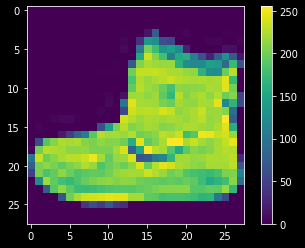

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()


In [8]:
print(f"Identicação treino min ==> {identificacoes_treino.min()}")
print(f"Identicação treino max ==> {identificacoes_treino.max()}")
print(f"Total de classificação treino ==> {identificacoes_treino.max() + 1}")


Identicação treino min ==> 0
Identicação treino max ==> 9
Total de classificação treino ==> 10


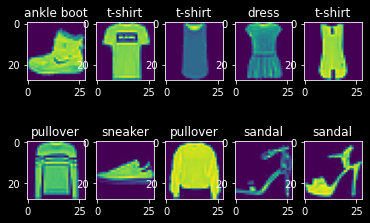

In [9]:
classificacao = ['t-shirt', 'trouser', 'pullover', 'dress',
                 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

for img in range(10):
    plt.subplot(2, 5, img + 1)
    plt.imshow(imagens_treino[img])
    plt.title(classificacao[identificacoes_treino[img]])


In [10]:
imagens_treino = imagens_treino / float(255)  # normalização

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(
        input_shape=(28, 28)),
    tf.keras.layers.Dense(
        256, activation=tf.nn.relu),  # relu ==> Unidade Linear Retificada
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        10, activation=tf.nn.softmax)
])


In [11]:
modelo.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy", metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino,
                       epochs=4, validation_split=0.2)


Epoch 1/4
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5232 - accuracy: 0.8121 - val_loss: 0.4332 - val_accuracy: 0.8373
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3994 - accuracy: 0.8551 - val_loss: 0.3804 - val_accuracy: 0.8608
Epoch 3/4
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3615 - accuracy: 0.8679 - val_loss: 0.3905 - val_accuracy: 0.8533
Epoch 4/4
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8734 - val_loss: 0.3553 - val_accuracy: 0.8737


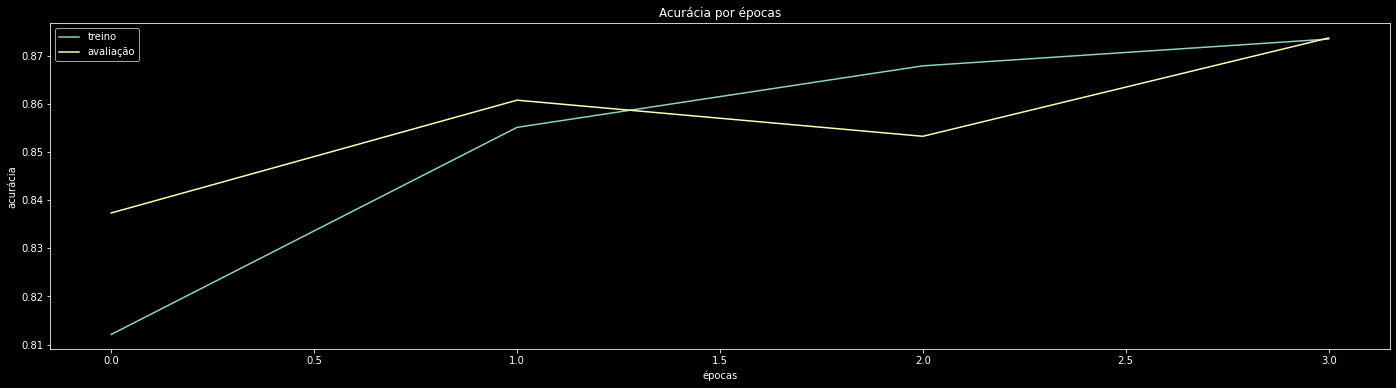

In [12]:
plt.figure(figsize=(24, 6))
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'avaliação'])


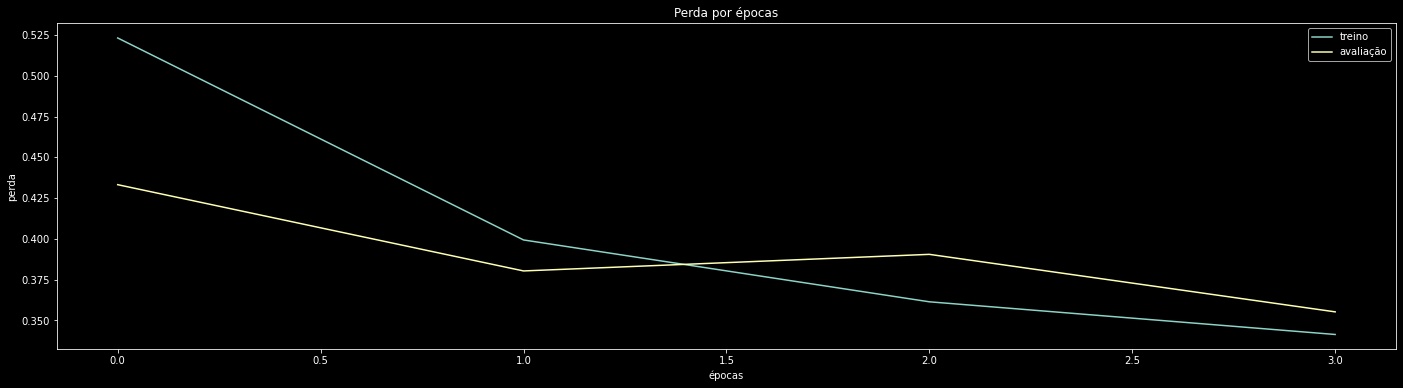

In [13]:
plt.figure(figsize=(24, 6))
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])


<h3>Underfitting</h3>
<p style="text-indent: 50px">quando os dados de validação estão menor que dados de treino (dados de treino mais altos)</p>
<h3>Overfitting</h3>
<p style="text-indent: 50px">quando os dados de validação estáo maior que dados de treino (dados de teste mais altos)</p>


In [14]:
predicoes = modelo.predict(imagens_testes)
print(f"Total de predições: {len(predicoes)}")
print(f"Total de real: {len(identificaoes_teste)} ")

print(f"Número da imagem de teste: {identificaoes_teste[0]}")
print(f"Resultado teste: {np.argmax(predicoes[0])}")


Total de predições: 10000
Total de real: 10000 
Número da imagem de teste: 9
Resultado teste: 9


In [15]:
loss_teste, accuracy_teste = modelo.evaluate(
    imagens_testes, identificaoes_teste)
print(f'Perdas: {loss_teste}')
print(f'Accurácia: {accuracy_teste}')


313/313 [==============================] - 0s 1ms/step - loss: 69.9021 - accuracy: 0.8488
Perdas: 69.90205383300781
Accurácia: 0.848800003528595


<p>Sumário do Modelo</p>

In [16]:
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


<p>Pesos da Camada Dense</p>

In [17]:
peso_camada_dense = modelo.layers[1].get_weights()[0]
vieses_camada_dense = modelo.layers[1].get_weights()[1]


In [18]:
peso_camada_dense_zerados = np.zeros(peso_camada_dense.shape)
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

peso_camada_dense_aleatorio = np.random.rand(peso_camada_dense.shape[0], peso_camada_dense.shape[1])

In [19]:
modelo.layers[1].set_weights([peso_camada_dense_aleatorio, vieses_camada_dense_zerados])

In [20]:
adam = tf.keras.optimizers.Adam(learning_rate=0.002)  # lr ==> learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True)
]

modelo.compile(optimizer=adam,
               loss="sparse_categorical_crossentropy", metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=150, callbacks=callbacks, epochs=4,
                       validation_split=0.2)


Epoch 1/4
320/320 [==============================] - 1s 4ms/step - loss: 122.6874 - accuracy: 0.3096 - val_loss: 14.0235 - val_accuracy: 0.6352
Epoch 2/4
320/320 [==============================] - 1s 4ms/step - loss: 37.4845 - accuracy: 0.5317 - val_loss: 12.4683 - val_accuracy: 0.6913
Epoch 3/4
320/320 [==============================] - 2s 7ms/step - loss: 20.2852 - accuracy: 0.6157 - val_loss: 8.1950 - val_accuracy: 0.7182
Epoch 4/4
320/320 [==============================] - 1s 5ms/step - loss: 12.2819 - accuracy: 0.6516 - val_loss: 5.1884 - val_accuracy: 0.7480


In [21]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.2,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'a

In [22]:
modelo.save('modelo.h5')


In [23]:
modelo_load = tf.keras.models.load_model('modelo.h5')


In [24]:
predicoes = modelo_load.predict(imagens_testes)
print(f"Total de predições: {len(predicoes)}")
print(f"Total de real: {len(identificaoes_teste)} ")

print(f"Número da imagem de teste: {identificaoes_teste[1]}")
print(f"Resultado teste: {np.argmax(predicoes[1])}")


Total de predições: 10000
Total de real: 10000 
Número da imagem de teste: 2
Resultado teste: 2
